In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplcyberpunk
from matplotlib.ticker import MultipleLocator
#plt.style.use("cyberpunk")

In [2]:
dcd = np.empty((5,9))
h5md_chunked = np.empty((5,9))
h5md_contiguous = np.empty((5,9))
h5md_default = np.empty((5,9))
trr = np.empty((5,9))
xtc = np.empty((5,9))

In [3]:
dcd2 = np.empty((5,9))
h5md_chunked2 = np.empty((5,9))
h5md_contiguous2 = np.empty((5,9))
h5md_default2 = np.empty((5,9))
trr2 = np.empty((5,9))
xtc2 = np.empty((5,9))

In [21]:
for i in range(5):
    dcd[i] = np.load(f"Agave/benchmarks/serial/results/old_assignment/old_assignment_3/dcd_{i+1}/YiiP_system_9ns_center100x_times.npy")
    h5md_chunked[i] = np.load(f"Agave/benchmarks/serial/results/old_assignment/old_assignment_3/h5md_chunked_{i+1}/YiiP_system_9ns_center100x_chunked_times.npy")
    h5md_contiguous[i] = np.load(f"Agave/benchmarks/serial/results/old_assignment/old_assignment_3/h5md_contiguous_{i+1}/YiiP_system_9ns_center100x_contiguous_times.npy")
    h5md_default[i] = np.load(f"Agave/benchmarks/serial/results/old_assignment/old_assignment_3/h5md_default_{i+1}/YiiP_system_9ns_center100x_times.npy")
    trr[i] = np.load(f"Agave/benchmarks/serial/results/old_assignment/old_assignment_3/trr_{i+1}/YiiP_system_9ns_center100x_times.npy")
    xtc[i] = np.load(f"Agave/benchmarks/serial/results/old_assignment/old_assignment_3/xtc_{i+1}/YiiP_system_9ns_center100x_times.npy")
    
    dcd2[i] = np.load(f"Agave/benchmarks/serial/results/read_direct/read_direct_1/dcd_{i+1}/YiiP_system_9ns_center100x_times.npy")
    h5md_chunked2[i] = np.load(f"Agave/benchmarks/serial/results/read_direct/read_direct_1/h5md_chunked_{i+1}/YiiP_system_9ns_center100x_chunked_times.npy")
    h5md_contiguous2[i] = np.load(f"Agave/benchmarks/serial/results/read_direct/read_direct_1/h5md_contiguous_{i+1}/YiiP_system_9ns_center100x_contiguous_times.npy")
    h5md_default2[i] = np.load(f"Agave/benchmarks/serial/results/read_direct/read_direct_1/h5md_default_{i+1}/YiiP_system_9ns_center100x_times.npy")
    trr2[i] = np.load(f"Agave/benchmarks/serial/results/read_direct/read_direct_1/trr_{i+1}/YiiP_system_9ns_center100x_times.npy")
    xtc2[i] = np.load(f"Agave/benchmarks/serial/results/read_direct/read_direct_1/xtc_{i+1}/YiiP_system_9ns_center100x_times.npy")

In [22]:
dcd3 = np.vstack((dcd, dcd2))
cols = ['Init', 'Init_Top', 'Init_Traj', 'IO', 'IO/Frame', 'RMSD', 'RMSD/Frame', 'Close', 'Total']
pd.DataFrame(dcd3, columns=cols)

,Init,Init_Top,Init_Traj,IO,IO/Frame,RMSD,RMSD/Frame,Close,Total
0,6.153463,5.852067,0.293690,838.220883,0.009303,20.339122,0.000226,0.016165,864.729633
1,6.163353,5.901697,0.254086,637.289866,0.007073,20.215228,0.000224,0.000454,663.668901
2,7.725302,7.621068,0.099405,676.632888,0.007510,20.137440,0.000224,0.000510,704.496139
3,5.106388,4.002315,1.097209,539.091696,0.005983,15.875855,0.000176,0.000609,560.074548
4,2.340715,2.020187,0.314684,669.460683,0.007430,20.439815,0.000227,0.000528,692.241740
5,2.926095,2.362408,0.558065,380.003655,0.004218,13.908545,0.000154,0.000256,396.838552
6,4.120581,4.010455,0.104765,409.936668,0.004550,13.944508,0.000155,0.000269,428.002027
7,3.073718,2.965635,0.100119,439.395526,0.004877,14.531831,0.000161,0.000242,457.001317
8,3.090024,2.963366,0.120863,410.188262,0.004553,13.847001,0.000154,0.000220,427.125507
9,2.695903,2.352036,0.341245,251.933073,0.002796,13.836387,0.000154,0.000237,268.465600


In [23]:
h5md3 = np.vstack((h5md_chunked, h5md_chunked2))

In [24]:
trr3 = np.vstack((trr, trr2))
xtc3 = np.vstack((xtc, xtc2))

In [25]:
np.mean(dcd[:,3])

672.1392033576965

In [26]:
means = np.empty((6,4))

means[0,0] = np.mean(dcd[:,3])
means[0,1] = np.mean(dcd2[:,3])
means[0,2] = np.mean(dcd[:,5])
means[0,3] = np.mean(dcd2[:,5])

means[1,0] = np.mean(h5md_chunked[:,3])
means[1,1] = np.mean(h5md_chunked2[:,3])
means[1,2] = np.mean(h5md_chunked[:,5])
means[1,3] = np.mean(h5md_chunked2[:,5])

means[2,0] = np.mean(h5md_contiguous[:,3])
means[2,1] = np.mean(h5md_contiguous2[:,3])
means[2,2] = np.mean(h5md_contiguous[:,5])
means[2,3] = np.mean(h5md_contiguous2[:,5])

means[3,0] = np.mean(h5md_default[:,3])
means[3,1] = np.mean(h5md_default2[:,3])
means[3,2] = np.mean(h5md_default[:,5])
means[3,3] = np.mean(h5md_default2[:,5])

means[4,0] = np.mean(trr[:,3])
means[4,1] = np.mean(trr2[:,3])
means[4,2] = np.mean(trr[:,5])
means[4,3] = np.mean(trr2[:,5])

means[5,0] = np.mean(xtc[:,3])
means[5,1] = np.mean(xtc2[:,3])
means[5,2] = np.mean(xtc[:,5])
means[5,3] = np.mean(xtc2[:,5])

In [27]:
errors = np.empty((6,4))

errors[0,0] = np.std(dcd[:,3])
errors[0,1] = np.std(dcd2[:,3])
errors[0,2] = np.std(dcd[:,5])
errors[0,3] = np.std(dcd2[:,5])

errors[1,0] = np.std(h5md_chunked[:,3])
errors[1,1] = np.std(h5md_chunked2[:,3])
errors[1,2] = np.std(h5md_chunked[:,5])
errors[1,3] = np.std(h5md_chunked2[:,5])

errors[2,0] = np.std(h5md_contiguous[:,3])
errors[2,1] = np.std(h5md_contiguous2[:,3])
errors[2,2] = np.std(h5md_contiguous[:,5])
errors[2,3] = np.std(h5md_contiguous2[:,5])

errors[3,0] = np.std(h5md_default[:,3])
errors[3,1] = np.std(h5md_default2[:,3])
errors[3,2] = np.std(h5md_default[:,5])
errors[3,3] = np.std(h5md_default2[:,5])

errors[4,0] = np.std(trr[:,3])
errors[4,1] = np.std(trr2[:,3])
errors[4,2] = np.std(trr[:,5])
errors[4,3] = np.std(trr2[:,5])

errors[5,0] = np.std(xtc[:,3])
errors[5,1] = np.std(xtc2[:,3])
errors[5,2] = np.std(xtc[:,5])
errors[5,3] = np.std(xtc2[:,5])

In [28]:
columns = ["IO", "IO2", "RMSD", "RMSD2",]
index = ["DCD", "H5MD-chunked", "H5MD-contiguous", "H5MD-default", "TRR", "XTC"]
mean_dframe = pd.DataFrame(means, columns=columns, index=index)
mean_dframe

,IO,IO2,RMSD,RMSD2
DCD,672.139203,378.291437,19.401492,14.013654
H5MD-chunked,760.930258,460.539749,17.706357,13.667125
H5MD-contiguous,611.583734,504.393022,16.183416,14.115925
H5MD-default,3478.410437,4101.082797,13.914295,13.952251
TRR,1454.064854,1414.491395,11.784362,11.572413
XTC,823.458678,709.164676,11.882056,11.438260


In [29]:
columns = ["IO", "IO2", "RMSD", "RMSD2",]
index = ["DCD", "H5MD-chunked", "H5MD-contiguous", "H5MD-default", "TRR", "XTC"]
error_dframe = pd.DataFrame(errors, columns=columns, index=index)
error_dframe

,IO,IO2,RMSD,RMSD2
DCD,96.464094,65.911920,1.765852,0.262120
H5MD-chunked,103.358754,36.878829,0.569585,0.165204
H5MD-contiguous,258.066421,9.473219,1.052708,0.176243
H5MD-default,965.413210,962.890739,0.303576,0.096272
TRR,30.559073,43.832359,0.262022,0.126222
XTC,77.973602,5.703659,0.477888,0.155725


In [30]:
yerrs = error_dframe.loc[['H5MD-chunked', 'H5MD-contiguous', 'H5MD-default'],'IO2']
yerrs

H5MD-chunked        36.878829
H5MD-contiguous      9.473219
H5MD-default       962.890739
Name: IO2, dtype: float64

<ipython-input-31-92482caf7400>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().yaxis.get_ticklocs(minor=True)


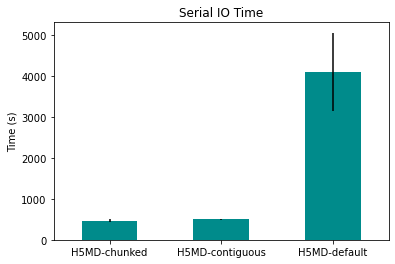

In [31]:
mean_dframe.loc[['H5MD-chunked', 'H5MD-contiguous', 'H5MD-default'],'IO2'].plot(kind='bar', color='darkcyan',yerr=yerrs)
plt.xticks(rotation=0, horizontalalignment="center")
plt.ylabel('Time (s)')
plt.title('Serial IO Time')
plt.axes().yaxis.get_ticklocs(minor=True)
plt.savefig('Serial_IO.pdf')

In [26]:
plt.axes?

In [16]:
columns = ["IO", "IO_std", "RMSD", "RSMD_std", "IO", "IO_std", "RMSD", "RMSD_std"]
index = ["DCD", "H5MD_chunked", "H5MD_contiguous", "H5MD_default", "TRR", "XTC"]
dframe = pd.DataFrame(array, columns=columns, index=index)
dframe

NameError: name 'array' is not defined

In [31]:
yerrs = dframe.loc[['H5MD_chunked', 'H5MD_contiguous', 'H5MD_default'],'IO_std']
dframe.loc[['H5MD_chunked', 'H5MD_contiguous', 'H5MD_default'],'IO'].plot(kind='bar', yerr=yerrs)
plt.xticks(rotation=0, horizontalalignment="center")
plt.ylabel('Time (s)')
plt.title('Serial IO Time')
lgd = plt.legend(['old_assignment', 'read_direct'])

NameError: name 'dframe' is not defined

In [ ]:
yerr = dframe.loc[['H5MD_chunked', 'H5MD_contiguous', 'H5MD_default'],'RMSD_std']
dframe.loc[['H5MD_chunked', 'H5MD_contiguous', 'H5MD_default'],'RMSD'].plot(kind='bar', yerr=yerr)
plt.xticks(rotation=0, horizontalalignment="center")
plt.ylabel('Time (s)')
plt.title('Compute RMSD Time')
lgd = plt.legend(['old_assignment', 'read_direct'])

In [ ]:
yerr = dframe.loc[['H5MD_chunked', 'DCD', 'TRR', 'XTC'],'IO_std']
dframe.loc[['H5MD_chunked', 'DCD', 'TRR', 'XTC'],'IO'].plot(kind='bar', yerr=yerr)
plt.xticks(rotation=0, horizontalalignment="center")
plt.ylabel('Time (s)')
plt.title("Serial IO Time")
lgd = plt.legend(['old_assignment', 'read_direct'])

In [ ]:
yerr = dframe.loc[['H5MD_chunked', 'DCD', 'TRR', 'XTC'],'RMSD_std']
dframe.loc[['H5MD_chunked', 'DCD', 'TRR', 'XTC'],'RMSD'].plot(kind='bar', yerr=yerr)
plt.xticks(rotation=0, horizontalalignment="center")
plt.ylabel('Time (s)')
plt.title('Compute RMSD Time')
lgd = plt.legend(['old_assignment', 'read_direct'])

In [32]:
array2 = np.empty((4,4))

array2[0,0] = np.mean(dcd3[:,3])
array2[0,1] = np.std(dcd3[:,3])
array2[0,2] = np.mean(dcd3[:,5])
array2[0,3] = np.std(dcd3[:,5])

array2[1,0] = np.mean(h5md3[:,3])
array2[1,1] = np.std(h5md3[:,3])
array2[1,2] = np.mean(h5md3[:,5])
array2[1,3] = np.std(h5md3[:,5])

array2[2,0] = np.mean(trr[:,3])
array2[2,1] = np.std(trr[:,3])
array2[2,2] = np.mean(trr[:,5])
array2[2,3] = np.std(trr[:,5])

array2[3,0] = np.mean(xtc[:,3])
array2[3,1] = np.std(xtc[:,3])
array2[3,2] = np.mean(xtc[:,5])
array2[3,3] = np.std(xtc[:,5])

In [40]:
columns2 = ["IO", "IO_std", "RMSD", "RSMD_std"]
index2 = ["DCD", "H5MD-chunked", "TRR", "XTC"]
dframe2 = pd.DataFrame(array2, columns=columns2, index=index2)
dframe2

,IO,IO_std,RMSD,RSMD_std
DCD,525.215320,168.557049,16.707573,2.975007
H5MD-chunked,610.735004,169.056660,15.686741,2.062695
TRR,1454.064854,30.559073,11.784362,0.262022
XTC,823.458678,77.973602,11.882056,0.477888


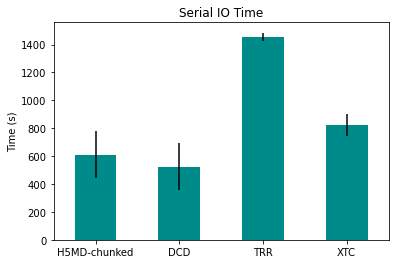

In [44]:
yerr = dframe2.loc[['H5MD-chunked', 'DCD', 'TRR', 'XTC'],'IO_std']
dframe2.loc[['H5MD-chunked', 'DCD', 'TRR', 'XTC'],'IO'].plot(kind='bar', color='darkcyan', yerr=yerr)
plt.xticks(rotation=0, horizontalalignment="center")
plt.ylabel('Time (s)')
plt.title("Serial IO Time")
plt.savefig("format-comparison.pdf")